In [ ]:
# !pip install matplotlib
# !pip install pandas
# !pip install seaborn
# !pip install numpy


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

path = '/content/drive/MyDrive/주간프로젝트/listings.csv'

In [ ]:
# !pip install koreanize-matplotlib
import koreanize_matplotlib

In [ ]:
# # matplotlib 한글 폰트 오류 문제 해결
# from matplotlib import font_manager, rc
# import matplotlib as mpl
# font_path = '../data/malgun.ttf'
# font_name = font_manager.FontProperties(fname=font_path).get_name()
# rc('font', family=font_name)
# # 마이너스 깨짐 현상 해결
# mpl.rcParams['axes.unicode_minus'] = False

In [ ]:
df = pd.read_csv(path)
df = pd.DataFrame(df)

In [ ]:
dat = df.copy()

<h3>필요한 컬럼 가져오기(32개) <h3>

In [ ]:
dat.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [ ]:
dat['last_scraped']

0        2024-03-21
1        2024-03-20
2        2024-03-20
3        2024-03-20
4        2024-03-21
            ...    
90847    2024-03-19
90848    2024-03-19
90849    2024-03-21
90850    2024-03-20
90851    2024-03-19
Name: last_scraped, Length: 90852, dtype: object

In [ ]:
#필요한 컬럼 가져오기
selected_columns = ['id','listing_url','description','host_id','host_response_rate','host_has_profile_pic',
                    'host_identity_verified','host_is_superhost','host_total_listings_count','neighbourhood_cleansed','latitude',
                    'longitude','room_type','accommodates','bathrooms','bedrooms','beds','amenities','price','has_availability',
                    'minimum_nights','maximum_nights','number_of_reviews','number_of_reviews_l30d',
                    'review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
                    'review_scores_checkin','review_scores_communication','review_scores_location',
                    'review_scores_value','reviews_per_month']
df = df[selected_columns]

df.head(3)


,id,listing_url,description,host_id,host_response_rate,host_has_profile_pic,host_identity_verified,host_is_superhost,host_total_listings_count,neighbourhood_cleansed,...,number_of_reviews,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,312761,https://www.airbnb.com/rooms/312761,"Very central location, in the middle of Shored...",1608226,100%,t,t,t,3.0,Hackney,...,122,0,4.96,4.97,4.93,4.96,5.00,4.89,4.93,0.86
1,13913,https://www.airbnb.com/rooms/13913,My bright double bedroom with a large window h...,54730,86%,t,t,t,5.0,Islington,...,41,0,4.80,4.73,4.73,4.75,4.83,4.70,4.70,0.25
2,15400,https://www.airbnb.com/rooms/15400,Lots of windows and light. St Luke's Gardens ...,60302,100%,t,t,f,1.0,Kensington and Chelsea,...,94,0,4.80,4.85,4.88,4.88,4.83,4.93,4.74,0.54


<h3>필요한 컬럼명 변경<h3>

컬렴명 변경

- 'id' : '숙소 id'
- 'listing_url' : '숙소 url'
- 'description' : '숙소상세설명'
- 'host_id' : '호스트 id'
- 'host_response_rate' : '문의 응답률'
- 'host_is_superhost' : '슈퍼호스트 여부'
- 'host_has_profile_pic' : '프로필사진_소유_여부'
- 'host_identity_verified' : '신원검증_여부'
- 'latitude' : '위도'
- 'longitude' : '경도'
- 'has_availability' : '숙소_예약가능_여부'
- 'host_total_listings_count' : '등록한 총 숙소 수'
- 'neighbourhood_cleansed' : '클린된 숙소 구'
- 'room_type' : '룸 유형'
- 'accommodates' : '수용 인원수'
- 'bathrooms' : '욕실수'
- 'bedrooms' : '침실수'
- 'beds' : '침대수'
- 'amenities' : '어메니티'
- 'price' : '숙소 가격'
- 'minimum_nights' : '최소 숙박일'
- 'maximum_nights' : '최대 숙박일'
- 'number_of_reviews' : '총 리뷰수'
- 'number_of_reviews_l30d' : '한달치 리뷰수'
- 'review_scores_rating' : '리뷰 총점수'
- 'review_scores_accuracy' : '리뷰점수(숙소정보 정확성 )'
- 'review_scores_cleanliness' : '리뷰점수(청결함)'
- 'review_scores_checkin' : '리뷰점수(체크인과정)'
- 'review_scores_communication' : '리뷰점수(호스트와 소통)'
- 'review_scores_location' : '리뷰점수(숙소위치)'
- 'review_scores_value' : '리뷰점수(숙소가격)'
- 'reviews_per_month' : '월별 평균 리뷰수'

In [ ]:
#컬럼명 변경
df = df.rename(columns={
    'id' : '숙소_id',
    'listing_url' : '숙소_url',
    'description' : '숙소_상세설명',
    'host_id' : '호스트_id',
    'host_response_rate' : '문의_응답률',
    'host_is_superhost' : '슈퍼호스트',
    'host_total_listings_count' : '숙소_수',
    'host_has_profile_pic' : '프로필사진_소지_여부',
    'host_identity_verified' : '신원_검증_여부',
    'neighbourhood_cleansed' : '숙소_지역',
    'latitude' : '위도',
    'longitude' : '경도',
    'room_type' : '숙소_유형',
    'accommodates' : '수용인원수',
    'bathrooms' : '욕실수',
    'bedrooms' : '침실수',
    'beds' : '침대수',
    'amenities' : '어메니티',
    'price' : '숙소_가격',
    'minimum_nights' : '최소_숙박일',
    'maximum_nights' : '최대_숙박일',
    'minimum_maximum_nights' : '적은_최대_숙박일',
    'maximum_maximum_nights' : '많은_최대_숙박일',
    'has_availability' : '숙소_예약가능_여부',
    'number_of_reviews' : '리뷰수',
    'number_of_reviews_l30d' : '30일_리뷰수',
    'review_scores_rating' : '리뷰점수',
    'review_scores_accuracy' : '숙소_정확성_리뷰점수',
    'review_scores_cleanliness' : '숙소_청결도_리뷰점수',
    'review_scores_checkin' : '숙소_체크인_리뷰점수',
    'review_scores_communication' : '숙소_소통_리뷰점수',
    'review_scores_location' : '숙소_위치_리뷰점수',
    'review_scores_value' : '숙소_가격_리뷰점수',
    'reviews_per_month' : '평균_리뷰수'
})

<h3>주제별 컬럼 분류<h3><br>

숙소/숙박 컬럼 (25개) - 리뷰 컬럼(10개)

In [ ]:
#숙소/숙박관련 컬럼

df_lodging = dat[['id', 'listing_url','host_id','host_response_rate','host_is_superhost',
                  'host_total_listings_count','neighbourhood_cleansed','room_type','accommodates','bathrooms','bedrooms',
                  'beds','amenities','price','minimum_nights','maximum_nights']]
df_lodging.head(3)

,id,listing_url,host_id,host_response_rate,host_is_superhost,host_total_listings_count,neighbourhood_cleansed,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights
0,312761,https://www.airbnb.com/rooms/312761,1608226,100%,t,3.0,Hackney,Entire home/apt,2,1.0,1.0,1.0,"[""Toaster"", ""Room-darkening shades"", ""Coffee m...",$160.00,9,180
1,13913,https://www.airbnb.com/rooms/13913,54730,86%,t,5.0,Islington,Private room,1,1.0,1.0,1.0,"[""Toaster"", ""Room-darkening shades"", ""Shampoo""...",$65.00,1,29
2,15400,https://www.airbnb.com/rooms/15400,60302,100%,f,1.0,Kensington and Chelsea,Entire home/apt,2,1.0,1.0,1.0,"[""Shampoo"", ""Wifi"", ""Fire extinguisher"", ""Lugg...",$120.00,4,30


In [ ]:
# 컬럼명 변경

df_lodging = df_lodging.rename(columns={
    'id': '숙소_id',
    'host_id': '호스트_id',
    'listing_url' : '숙소_url',
    'host_response_rate': '문의_응답률',
    'host_is_superhost': '슈퍼호스트',
    'host_total_listings_count': '숙소_수',
    'neighbourhood_cleansed': '숙소_지역',
    'room_type': '숙소_유형',
    'accommodates': '수용인원수',
    'bathrooms': '욕실수',
    'bedrooms': '침실수',
    'beds': '침대수',
    'amenities': '편의시설',
    'price': '숙소_가격',
    'minimum_nights': '최소_숙박일',
    'maximum_nights': '최대_숙박일'
})

df_lodging.head(3)

,숙소_id,숙소_url,호스트_id,문의_응답률,슈퍼호스트,숙소_수,숙소_지역,숙소_유형,수용인원수,욕실수,침실수,침대수,편의시설,숙소_가격,최소_숙박일,최대_숙박일
0,312761,https://www.airbnb.com/rooms/312761,1608226,100%,t,3.0,Hackney,Entire home/apt,2,1.0,1.0,1.0,"[""Toaster"", ""Room-darkening shades"", ""Coffee m...",$160.00,9,180
1,13913,https://www.airbnb.com/rooms/13913,54730,86%,t,5.0,Islington,Private room,1,1.0,1.0,1.0,"[""Toaster"", ""Room-darkening shades"", ""Shampoo""...",$65.00,1,29
2,15400,https://www.airbnb.com/rooms/15400,60302,100%,f,1.0,Kensington and Chelsea,Entire home/apt,2,1.0,1.0,1.0,"[""Shampoo"", ""Wifi"", ""Fire extinguisher"", ""Lugg...",$120.00,4,30


In [ ]:
#리뷰관련데이터
df_review = dat[['listing_url','number_of_reviews', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy',
                'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
                'review_scores_location', 'review_scores_value', 'reviews_per_month']]
df_review.head(3)

,listing_url,number_of_reviews,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,https://www.airbnb.com/rooms/312761,122,0,4.96,4.97,4.93,4.96,5.00,4.89,4.93,0.86
1,https://www.airbnb.com/rooms/13913,41,0,4.80,4.73,4.73,4.75,4.83,4.70,4.70,0.25
2,https://www.airbnb.com/rooms/15400,94,0,4.80,4.85,4.88,4.88,4.83,4.93,4.74,0.54


In [ ]:
# 컬럼명 변경
df_review = df_review.rename(columns={
    'listing_url' : '숙소_url',
    'number_of_reviews': '리뷰수',
    'number_of_reviews_l30d': '30일_리뷰수',
    'review_scores_rating': '리뷰점수',
    'review_scores_accuracy': '숙소_정확성_리뷰점수',
    'review_scores_cleanliness': '숙소_청결도_리뷰점수',
    'review_scores_checkin': '숙소_체크인_리뷰점수',
    'review_scores_communication': '숙소_소통_리뷰점수',
    'review_scores_location': '숙소_위치_리뷰점수',
    'review_scores_value': '숙소_가격_리뷰점수',
    'reviews_per_month': '평균_리뷰수'
})
df_review.head()

,숙소_url,리뷰수,30일_리뷰수,리뷰점수,숙소_정확성_리뷰점수,숙소_청결도_리뷰점수,숙소_체크인_리뷰점수,숙소_소통_리뷰점수,숙소_위치_리뷰점수,숙소_가격_리뷰점수,평균_리뷰수
0,https://www.airbnb.com/rooms/312761,122,0,4.96,4.97,4.93,4.96,5.00,4.89,4.93,0.86
1,https://www.airbnb.com/rooms/13913,41,0,4.80,4.73,4.73,4.75,4.83,4.70,4.70,0.25
2,https://www.airbnb.com/rooms/15400,94,0,4.80,4.85,4.88,4.88,4.83,4.93,4.74,0.54
3,https://www.airbnb.com/rooms/159736,96,0,4.72,4.79,4.66,4.75,4.89,4.34,4.66,0.62
4,https://www.airbnb.com/rooms/165336,237,2,4.74,4.88,4.79,4.94,4.96,4.87,4.71,1.57


In [ ]:
df_lodging.shape


(90852, 16)

In [ ]:
df_review.shape


(90852, 11)

In [ ]:
df.shape


(90852, 32)

In [ ]:
df.columns


Index(['숙소_id', '숙소_url', '숙소_상세설명', '호스트_id', '문의_응답률', '프로필사진_소지_여부',
       '신원_검증_여부', '슈퍼호스트', '숙소_수', '숙소_지역', '위도', '경도', '숙소_유형', '수용인원수',
       '욕실수', '침실수', '침대수', '어메니티', '숙소_가격', '숙소_예약가능_여부', '최소_숙박일', '최대_숙박일',
       '리뷰수', '30일_리뷰수', '리뷰점수', '숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', '숙소_체크인_리뷰점수',
       '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수', '평균_리뷰수'],
      dtype='object')

In [ ]:
df.dtypes


숙소_id            int64
숙소_url          object
숙소_상세설명         object
호스트_id           int64
문의_응답률          object
프로필사진_소지_여부     object
신원_검증_여부        object
슈퍼호스트           object
숙소_수           float64
숙소_지역           object
위도             float64
경도             float64
숙소_유형           object
수용인원수            int64
욕실수            float64
침실수            float64
침대수            float64
어메니티            object
숙소_가격           object
숙소_예약가능_여부      object
최소_숙박일           int64
최대_숙박일           int64
리뷰수              int64
30일_리뷰수          int64
리뷰점수           float64
숙소_정확성_리뷰점수    float64
숙소_청결도_리뷰점수    float64
숙소_체크인_리뷰점수    float64
숙소_소통_리뷰점수     float64
숙소_위치_리뷰점수     float64
숙소_가격_리뷰점수     float64
평균_리뷰수         float64
dtype: object

In [ ]:
#중복값 제거
df.drop_duplicates(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90852 entries, 0 to 90851
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   숙소_id        90852 non-null  int64  
 1   숙소_url       90852 non-null  object 
 2   숙소_상세설명      87851 non-null  object 
 3   호스트_id       90852 non-null  int64  
 4   문의_응답률       57797 non-null  object 
 5   프로필사진_소지_여부  90847 non-null  object 
 6   신원_검증_여부     90847 non-null  object 
 7   슈퍼호스트        90463 non-null  object 
 8   숙소_수         90847 non-null  float64
 9   숙소_지역        90852 non-null  object 
 10  위도           90852 non-null  float64
 11  경도           90852 non-null  float64
 12  숙소_유형        90852 non-null  object 
 13  수용인원수        90852 non-null  int64  
 14  욕실수          57894 non-null  float64
 15  침실수          78118 non-null  float64
 16  침대수          57837 non-null  float64
 17  어메니티         90852 non-null  object 
 18  숙소_가격        57885 non-null  object 
 19  숙소_예

<h3>결측치 개수</h3><br>

- 슈퍼호스트 389개
- 문의_응답률 33,055개
- 숙소_수 5개
- 욕실수 32,958개
- 침실수 12,734개
- 침대수 33,015개
- 숙소_가격 32,967개
- 리뷰점수 24,983개
- 숙소_정확성_리뷰점수 25014개
- 숙소_청결도_리뷰점수 25009개
- 숙소_체크인_리뷰점수 25044개
- 숙소_소통_리뷰점수 25019개
- 숙소_위치_리뷰점수 25044개
- 숙소_가격_리뷰점수 25046개
- 평균_리뷰수 24983개

- -----------------------------------------

- 숙소_상세설명 3,001개
- 프로필사진_소지_여부 5개
- 신원_검증_여부 5개
- 숙소_예약가능_여부 4079개

<h3>슈퍼호스트 결측치 처리</h3>

- 슈퍼호스트가 null값인 데이터 삭제 389개임(5%이하 해당)



In [ ]:
df['슈퍼호스트'].isna().sum()

389

In [ ]:
df = df.dropna(subset=['슈퍼호스트'])

In [ ]:
df.shape

(90463, 32)

<h3>숙소수 결측치 처리</h3>

- 숙소수가 null값인 데이터 삭제 5개임(5%이하 해당)

In [ ]:
df = df.dropna(subset=['숙소_수'])

In [ ]:
df.shape


(90458, 32)

In [ ]:
df['숙소_지역'].unique()

array(['Hackney', 'Islington', 'Kensington and Chelsea', 'Lambeth',
       'Brent', 'Southwark', 'Westminster', 'Wandsworth', 'Tower Hamlets',
       'Richmond upon Thames', 'Newham', 'Camden', 'Haringey', 'Enfield',
       'Hammersmith and Fulham', 'Waltham Forest', 'Barnet', 'Hounslow',
       'Barking and Dagenham', 'Croydon', 'Lewisham', 'Ealing', 'Merton',
       'City of London', 'Havering', 'Greenwich', 'Hillingdon', 'Bromley',
       'Redbridge', 'Harrow', 'Bexley', 'Kingston upon Thames', 'Sutton'],
      dtype=object)

In [ ]:
df['숙소_지역'].unique()

array(['Hackney', 'Islington', 'Kensington and Chelsea', 'Lambeth',
       'Westminster', 'Richmond upon Thames', 'Tower Hamlets',
       'Wandsworth', 'Camden', 'Haringey', 'Enfield',
       'Hammersmith and Fulham', 'Southwark', 'Brent', 'Waltham Forest',
       'Barnet', 'Barking and Dagenham', 'Croydon', 'Ealing', 'Lewisham',
       'Merton', 'City of London', 'Greenwich', 'Hounslow', 'Newham',
       'Hillingdon', 'Harrow', 'Redbridge', 'Kingston upon Thames',
       'Bromley', 'Sutton', 'Havering', 'Bexley'], dtype=object)

결측치 다 제거

In [ ]:
df = df.dropna(subset=['리뷰점수','숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', '숙소_체크인_리뷰점수',
                    '숙소_소통_리뷰점수', '숙소_위치_리뷰점수','숙소_가격_리뷰점수','리뷰수','숙소_가격',
                    '숙소_수'])

In [ ]:
df['숙소_수'].isna().sum()

0

In [ ]:
df.shape

(43439, 32)

In [ ]:

df['숙소_유형'].unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

In [ ]:
import pandas as pd

lodging_type = {
    'Entire home/apt': 1,
    'Private room': 2,
    'Hotel room': 3,
    'Shared room': 4
}

df["숙소_유형"] = df["숙소_유형"].replace(lodging_type)
df['숙소_유형']

<ipython-input-39-d8e0e5e324e2>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["숙소_유형"] = df["숙소_유형"].replace(lodging_type)


0        1
1        2
2        1
3        2
4        1
        ..
90451    2
90568    2
90590    1
90648    1
90735    2
Name: 숙소_유형, Length: 43439, dtype: int64

In [ ]:
df = df.dropna(subset=['숙소_가격'])


In [ ]:
df['숙소_가격'].isna().sum()

0

In [ ]:
df['숙소_가격']

0        $160.00
1         $65.00
2        $120.00
3         $65.00
4        $100.00
          ...   
90451     $46.00
90568     $78.00
90590    $136.00
90648    $109.00
90735     $41.00
Name: 숙소_가격, Length: 43439, dtype: object

In [ ]:
df.loc[:,'숙소_가격'] = df['숙소_가격'].str.replace('$', "")
df.loc[:,'숙소_가격'] = df['숙소_가격'].str.replace(',', "")
df.loc[:,'숙소_가격'] = df['숙소_가격'].str.strip()



In [ ]:
df['숙소_가격']

0        160.00
1         65.00
2        120.00
3         65.00
4        100.00
          ...  
90451     46.00
90568     78.00
90590    136.00
90648    109.00
90735     41.00
Name: 숙소_가격, Length: 43439, dtype: object

In [ ]:
df['숙소_가격'] = df.loc[:,'숙소_가격'].astype(float)


In [ ]:
df['숙소_가격']

0        160.0
1         65.0
2        120.0
3         65.0
4        100.0
         ...  
90451     46.0
90568     78.0
90590    136.0
90648    109.0
90735     41.0
Name: 숙소_가격, Length: 43439, dtype: float64

In [ ]:
df.groupby("숙소_지역")[["숙소_유형"]].value_counts()

숙소_지역                 숙소_유형
Barking and Dagenham  1         165
                      2         154
                      4           1
Barnet                1         745
                      2         384
                               ... 
Wandsworth            3           1
Westminster           1        4379
                      2         999
                      3          25
                      4          21
Name: count, Length: 108, dtype: int64

In [ ]:
import numpy as np
import pandas as pd

columns_to_scale = ['리뷰점수','숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', '숙소_체크인_리뷰점수',
                    '숙소_소통_리뷰점수', '숙소_위치_리뷰점수','숙소_가격_리뷰점수','리뷰수',
                    '숙소_수']

df[columns_to_scale]

,리뷰점수,숙소_정확성_리뷰점수,숙소_청결도_리뷰점수,숙소_체크인_리뷰점수,숙소_소통_리뷰점수,숙소_위치_리뷰점수,숙소_가격_리뷰점수,리뷰수,숙소_수
0,4.96,4.97,4.93,4.96,5.00,4.89,4.93,122,3.0
1,4.80,4.73,4.73,4.75,4.83,4.70,4.70,41,5.0
2,4.80,4.85,4.88,4.88,4.83,4.93,4.74,94,1.0
3,4.72,4.79,4.66,4.75,4.89,4.34,4.66,96,5.0
4,4.74,4.88,4.79,4.94,4.96,4.87,4.71,237,1.0
...,...,...,...,...,...,...,...,...,...
90451,3.00,3.00,4.00,3.00,4.00,3.00,4.00,1,23.0
90568,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1,20.0
90590,5.00,5.00,5.00,5.00,5.00,5.00,5.00,2,17.0
90648,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1,3.0


In [ ]:
df_source = df[columns_to_scale]

In [ ]:
cov_df_source = df_source.corr(method='pearson')

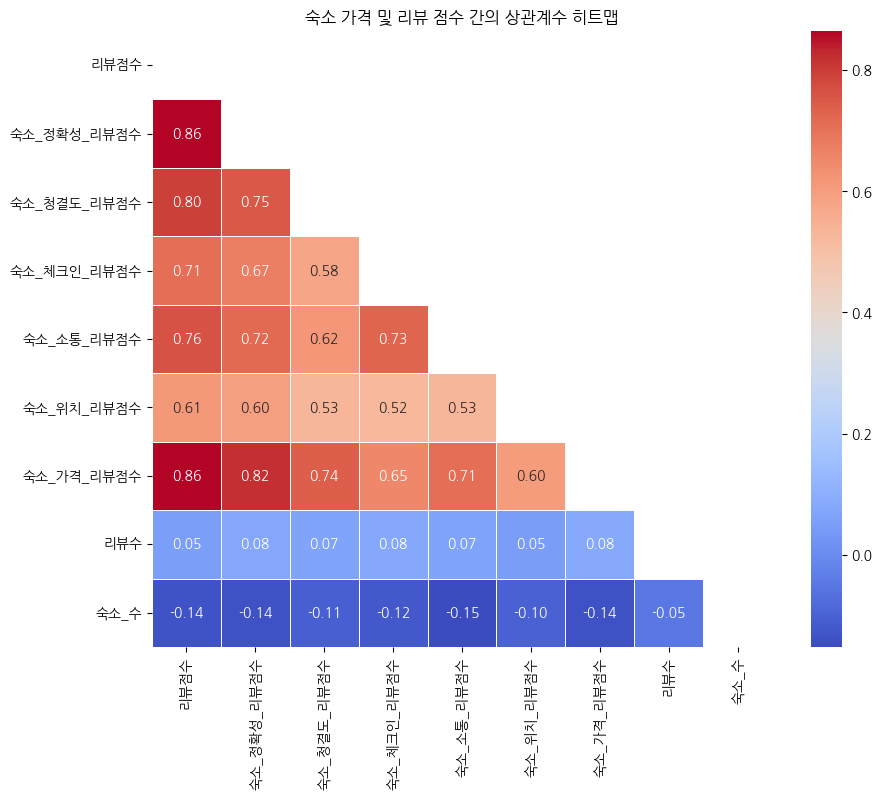

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
# 데이터프레임의 상관관계 계산
corr = df_source.corr()

# 마스크 생성 (상단 삼각형)
mask = np.triu(np.ones_like(corr, dtype=bool))

# 히트맵 그리기
plt.figure(figsize=(10, 8))  # 그래프의 크기 설정
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, mask=mask)
plt.title('숙소 가격 및 리뷰 점수 간의 상관계수 히트맵')  # 그래프 제목 설정
plt.show()